In [1]:
import numpy as np

In [2]:
import pandas as pd

In [6]:
import re #re: 정규 표현식

In [7]:
# 문장 텍스트 분해 과정

# 아무 문장이나 뉴스에서 긁어와서 텍스트로 담아줌.
text = "손흥민은 5일 영국 런던의 셀허스트 파크에서 열린 2022~2023시즌 잉글랜드 프리미어리그(EPL) 19라운드에 선발 출전해 리그 4호골을 터뜨리며 크리스털 팰리스를 상대로 4-0 대승을 이끌었다."

In [8]:
text.split() # 빈공간을 기준으로 문장 분할

['손흥민은',
 '5일',
 '영국',
 '런던의',
 '셀허스트',
 '파크에서',
 '열린',
 '2022~2023시즌',
 '잉글랜드',
 '프리미어리그(EPL)',
 '19라운드에',
 '선발',
 '출전해',
 '리그',
 '4호골을',
 '터뜨리며',
 '크리스털',
 '팰리스를',
 '상대로',
 '4-0',
 '대승을',
 '이끌었다.']

In [9]:
# 아무 문장이나 더 연습
text2 = "안녕+나는+뽀로로야"
re.split("\+", text2) 

['안녕', '나는', '뽀로로야']

In [10]:
text2.split("+")

['안녕', '나는', '뽀로로야']

In [11]:
text3 = """
이름:크롱
전화번호:010-1234-5678
나이:3
성별:남아
"""
re.findall("\d+", text3) # d: 숫자만 추출해서 뽑아내고 싶을 경우 사용

['010', '1234', '5678', '3']

In [16]:
text4 = "그 효과는 득점 장면을 제외한 경기 내용에서도 잘 드러났다. 손흥민이 중앙으로 이동할 때마다 경기가 손쉽게 풀렸다. 후반 22분 단짝인 케인이 찔러준 공을 받은 뒤 질주해 페널티지역에서 슈팅을 시도한 것이 대표적이다. 1분 뒤에는 케인에서 건네받은 공을 맷 도허티에게 연결해 추가골로 이어졌다. EPL 규정상 공식 어시스트로 기록되지 않은 게 아쉬울 따름이다."
re_res = re.sub("[^a-zA-Z]", ' ', text4) # 영어 소문자나 대문자가 아닌것은 ' '로 가져와서 이외의 문자들 모두 지워버림
re_res

# 영문자만 남기고 한글, 숫자 다 사라짐

'                                                                                                                                                                     EPL                                 '

In [17]:
re_res.split() # 추출한 영문자를 공백으로 나눠서 단어 단위로 나눠줌

# 앞으로 단어들을 추출하고자 할 때 이런 방식으로 많이 추출한다.

['EPL']

In [18]:
# 원하는 문자만 다 찾아서 지워보자.

text5 = "ㅋㅋㅋ so 이따가 시간돼? ㅠㅠ"
re.compile("[ |가-힣]+").sub("", text5) # ("[ |가-힣]+")이 조건에 맞는 문자는 없애라

# `가-힣` : 단순 자음, 모음을 제외한 한글 문자의 모든 범위. 영문자로 치면 약 `a-Z`

'ㅋㅋㅋso?ㅠㅠ'

In [19]:
text5 = "ㅋㅋㅋ so 이따가 시간돼?"
re.compile("[가-힣]+").findall(text5) # ("[가-힣]+") 이 조건에서 중요한 문자(단어)만 추출해보기

['이따가', '시간돼']

In [20]:
text6 = "ㅋㅋㅋ so 이따가 시간돼? ㅠㅠ"
re.compile("[가-힣]+").sub("", text6).split() # ("[ |가-힣]+")이 조건에 맞는 문자는 없애라

['ㅋㅋㅋ', 'so', '?', 'ㅠㅠ']

In [21]:
# http://naver.me/5CpLf8TB

In [22]:
# konlpy 설치는 자바가 필요함
# 자바 jdk -> pip install jpype -> pip install konlpy
# JPype 받을 때는 64bit 인지 주의 요망. cp38 버전인지도 주의 요먕.

In [23]:
import konlpy
konlpy.__version__

'0.6.0'

In [24]:
import sys

In [25]:
sys.version

'3.8.15 (default, Nov 24 2022, 14:38:14) [MSC v.1916 64 bit (AMD64)]'

In [26]:
from konlpy.tag import Okt #트위터에서 한글용으로 만든 패키지
okt = Okt()
tokens = okt.morphs("나는 자연어 처리를 배우고 있어요, 너무 신기해요") # 토큰에 처리하고자 하는 문자를 넣어줌
tokens

# 영어도 형태소 분석기를 써야함.
# 한글도 조사가 너무 많이 붙어서 형태소 분석기를 거의 필수로 써야함.
# 조사를 떼어내 주는게 형태소 분석기

['나', '는', '자연어', '처리', '를', '배우고', '있어요', ',', '너무', '신기해요']

In [27]:
"나는 자연어 처리를 배우고 있어요, 너무 신기해요".split()
# 단어 단위로 분할

['나는', '자연어', '처리를', '배우고', '있어요,', '너무', '신기해요']

In [28]:
# 영어전용 형태소 분석기 설치
# !pip install nltk

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import sent_tokenize

from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [34]:
text = """According to local legend, the devil escaped from hell and created the jagged glacial karsts in a single day of mischief."""

In [35]:
print(word_tokenize(text))

['According', 'to', 'local', 'legend', ',', 'the', 'devil', 'escaped', 'from', 'hell', 'and', 'created', 'the', 'jagged', 'glacial', 'karsts', 'in', 'a', 'single', 'day', 'of', 'mischief', '.']


In [36]:
print(WordPunctTokenizer().tokenize(text)) 

['According', 'to', 'local', 'legend', ',', 'the', 'devil', 'escaped', 'from', 'hell', 'and', 'created', 'the', 'jagged', 'glacial', 'karsts', 'in', 'a', 'single', 'day', 'of', 'mischief', '.']


In [37]:
print(text_to_word_sequence(text)) # 위와 다르게 쉼표가 사라짐

['according', 'to', 'local', 'legend', 'the', 'devil', 'escaped', 'from', 'hell', 'and', 'created', 'the', 'jagged', 'glacial', 'karsts', 'in', 'a', 'single', 'day', 'of', 'mischief']


In [38]:
# 여러 문장의 텍스트를 문장 단위로 토큰화 할 때

# 데이터 수집의 경우 - 단어 단위로 데이터를 수집
# 챗봇같은 경우에 활용할 땐 - 문장 단위로 데이터를 수집

text = """According to local legend, the devil escaped from hell and created the jagged glacial karsts in a single day of mischief.
"""
sent_tokenize(text) # 위와 다르게 `Don't`를 분리하는 기준이 달라짐.

['According to local legend, the devil escaped from hell and created the jagged glacial karsts in a single day of mischief.']

In [39]:
# 한국어 문장 분리 형태소분석기 설치
# !pip install kss

In [40]:
import kss

In [41]:
text = "딥러닝 자연어 처리는 흥미롭습니다. 그런데 재미는 없을 수도 있습니다. 특히 일상 언어는 너무 복잡합니다."
kss.split_sentences(text)

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://cleancode-ws.tistory.com/97
- konlpy.tag.Mecab: https://uwgdqo.tistory.com/363



['딥러닝 자연어 처리는 흥미롭습니다.', '그런데 재미는 없을 수도 있습니다.', '특히 일상 언어는 너무 복잡합니다.']

In [42]:
# 형태소 분석기 사용시에는 아래와 같은 문제를 고려해봐야 한다.

# 1. 원하는 파싱(Parsing) 결과가 나오는가?
# 2. 처리 속도는 적절한가?

In [43]:
from konlpy.tag import Okt, Kkma

In [44]:
okt = Okt()
kkma = Kkma()

In [45]:
text = "열심히 코딩한 당신, 잠도 잘 자고 일하세요."
print('---- OKT ----')
print("형태소 분석", okt.morphs(text))
print("품사 태깅", okt.pos(text)) 
print("명사 분석", okt.nouns(text)) #단어를 쪼갤 때는 명사를 주로 분석한다.print('---- OKT ----')
print('---- KKMA ----')
print("형태소 분석", kkma.morphs(text))
print("품사 태깅", kkma.pos(text)) 
print("명사 분석", kkma.nouns(text)) #단어를 쪼갤 때는 명사를 주로 분석한다.

# 구두를 추천받아야 하는 상황에 드레스를 추천하면 하면 안되기 때문에 구분 잘 하는게 중요

---- OKT ----
형태소 분석 ['열심히', '코딩', '한', '당신', ',', '잠도', '잘', '자고', '일', '하세요', '.']
품사 태깅 [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('잠도', 'Noun'), ('잘', 'Verb'), ('자고', 'Noun'), ('일', 'Noun'), ('하세요', 'Verb'), ('.', 'Punctuation')]
명사 분석 ['코딩', '당신', '잠도', '자고', '일']
---- KKMA ----
형태소 분석 ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '잠', '도', '잘', '자', '고', '일하', '세요', '.']
품사 태깅 [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('잠', 'NNG'), ('도', 'JX'), ('잘', 'MAG'), ('자', 'VV'), ('고', 'ECE'), ('일하', 'VV'), ('세요', 'EFN'), ('.', 'SF')]
명사 분석 ['코딩', '당신', '잠']


In [46]:
# 깃에서 라이브러리 가져옴.
# 파이썬 / 띄어쓰기를 자동으로 해주는 라이브러리
# !pip install git+https://github.com/haven-jeon/PyKoSpacing.git --user

In [47]:
text = """'그 효과는 득점 장면을 제외한 경기 내용에서도 잘 드러났다. 손흥민이 중앙으로 이동할 때마다 경기가 손쉽게 풀렸다. 후반 22분 단짝인 케인이 찔러준 공을 받은 뒤 질주해 페널티지역에서 슈팅을 시도한 것이 대표적이다. 1분 뒤에는 케인에서 건네받은 공을 맷 도허티에게 연결해 추가골로 이어졌다. EPL 규정상 공식 어시스트로 기록되지 않은 게 아쉬울 따름이다."""

In [48]:
# 띄어쓰기 전부 삭제 해주기
new_text = text.replace(" ", "")
new_text

"'그효과는득점장면을제외한경기내용에서도잘드러났다.손흥민이중앙으로이동할때마다경기가손쉽게풀렸다.후반22분단짝인케인이찔러준공을받은뒤질주해페널티지역에서슈팅을시도한것이대표적이다.1분뒤에는케인에서건네받은공을맷도허티에게연결해추가골로이어졌다.EPL규정상공식어시스트로기록되지않은게아쉬울따름이다."

In [49]:
from pykospacing import Spacing

In [50]:
# 원본 문장이랑 자동 띄어쓰기 처리 해준 내용 비교해보기
s = Spacing()
recon_text = s(new_text)
print(text)
print(recon_text)

1/1 [==============================] - 0s 412ms/step
'그 효과는 득점 장면을 제외한 경기 내용에서도 잘 드러났다. 손흥민이 중앙으로 이동할 때마다 경기가 손쉽게 풀렸다. 후반 22분 단짝인 케인이 찔러준 공을 받은 뒤 질주해 페널티지역에서 슈팅을 시도한 것이 대표적이다. 1분 뒤에는 케인에서 건네받은 공을 맷 도허티에게 연결해 추가골로 이어졌다. EPL 규정상 공식 어시스트로 기록되지 않은 게 아쉬울 따름이다.
'그 효과는 득점 장면을 제외한 경기내용에서도 잘 드러났다. 손흥민이 중앙으로 이동할 때마다 경기가 손쉽게 풀렸다. 후반 22분 단짝 인케인이 찔러준공을 받은 뒤 질주해 페널티 지역에서 슈팅을 시도한 것이 대표적이다.1분 뒤에는 케인에서 건네받은 공을 맷도 허티에게 연결해 추가골로 이어졌다. EPL 규정상 공식 어시스트로 기록되지 않은 게 아쉬울 따름이다.


In [51]:
# 맞춤법 교정 라이브러리
# !pip install git+https://github.com/ssut/py-hanspell.git

In [52]:
from hanspell import spell_checker

In [59]:
# 일부러 맞춤법 틀린 문장 적기
text_x = "마춤법 틀리묜 외않된데? 내맴대로 쓰묜되징!"
text_ok = spell_checker.check(text_x)
text_ok.checked

# 심각한 문장은 잘 못고친다.

'맞춤법 틀리면 외않된데? 내맴대로 쓰묜되징!'

In [61]:
# 일부러 맞춤법 틀린 문장 적기
text_x = "마춤법 틀리면 외 않되? 내맘대로 쓰면돼지!"
text_ok = spell_checker.check(text_x)
text_ok.checked

# 맞춤법이 적당히 틀리면 교정해준다.

'맞춤법 틀리면 왜 안돼? 내 맘대로 쓰면 되지!'

In [62]:
# 이건 이모티콘 간소화 라이브러리
# !pip install soynlp

In [63]:
from soynlp.normalizer import *

In [64]:
# 이모티콘 간소화?. 너무 긴 이모티콘성 문장을 적당하게 줄여줌
text = '앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이김밥존맛탱쿠쿠쿠ㅜㅜㅜㅋㅋㅋㅋㅋㅋㅋㅋ'
emoticon_normalize(text)

'아ㅋㅋ김밥존맛탱쿠쿠쿠ㅜㅜㅜㅋㅋ'

In [65]:
emoticon_normalize(text, num_repeats=3) # num_repeats : 길이 조절도 직접 가능함.

'아ㅋㅋㅋ김밥존맛탱쿠쿠쿠ㅜㅜㅜㅋㅋㅋ'

In [66]:
# 불용어, Stopwords 라이브러리 : 쓰지않는 용어, 조사처럼 불필요한 글자 빼고 싶을 때 사용
import nltk
# 필요한 패키지 미리 다운로드
# nltk.download("stopwords")
# nltk.download("punkt")

In [67]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

In [68]:
# 몇개 정도의 불용어가 정의돼있는지 확인
stop_words_list = stopwords.words("english")
len(stop_words_list)

# 179개의 불용어 정의됨

179

In [69]:
# 어떤 내용을 불용어로 정의했는지 10개만 확인
stop_words_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [70]:
test = "Mr Jassy did not specify where affected employees were located, but he said the firm would communicate with organisations that represent employees"
test = test.lower() # 투입한 문자 모두 소문자로 변환
token_1 = word_tokenize(test) # 워드 토크나이저로 분석해보기. (불용어 제거 전)
print(token_1) # 문장 내 단어 모두 분리.
# for문으로 불용어가 아닌것만 빈리스트에 넣어주는 방법으로도 필터링 작업 가능하다.

['mr', 'jassy', 'did', 'not', 'specify', 'where', 'affected', 'employees', 'were', 'located', ',', 'but', 'he', 'said', 'the', 'firm', 'would', 'communicate', 'with', 'organisations', 'that', 'represent', 'employees']


In [71]:
token_2 = [] # 불용어가 아닌것만 담을 빈 리스트 정의. 필터링 된 것만 담아줌.
for word in token_1:
    if word not in stop_words_list:
        token_2.append(word)
print(token_2)

['mr', 'jassy', 'specify', 'affected', 'employees', 'located', ',', 'said', 'firm', 'would', 'communicate', 'organisations', 'represent', 'employees']


In [72]:
'i' in stop_words_list # 특정 용어가 불용어 목록에 있는지 조회해보는 법

True

In [73]:
'he' in stop_words_list # 특정 용어가 불용어 목록에 있는지 조회해보는 법

True

In [74]:
'fuck' in stop_words_list # 특정 용어가 불용어 목록에 있는지 조회해보는 법
# 이렇게 추가 해야할 것 같은, 추가하고싶은 불용어 단어가 있다면
# 새로운 리스트 만들어서 추가해서 사용하면 된다.

False

In [75]:
# 직접 설정한 불용어까지 필터링 해보는 작업
test = "Drop your weapon. Fuck you ass hole. go the hell mother fucker"
test = test.lower() # 투입한 문자 모두 소문자로 변환
token_1 = word_tokenize(test) # 워드 토크나이저로 분석해보기. (불용어 제거 전)
print(token_1) # 문장 내 단어 모두 분리.

# 기본 제공 불용어 필터링 해주고
token_2 = [] # 불용어가 아닌것만 담을 빈 리스트 정의. 필터링 된 것만 담아줌.
for word in token_1:
    if word not in stop_words_list:
        token_2.append(word)
print(token_2)

my_stop_words = ["fuck", "ass", "hole"]

# 내가 따로 거르고자 하는 불용어 한번 더 걸러줌
token_3 = []
for word in token_2:
    if word not in my_stop_words:
        token_3.append(word)
print(token_3)

['drop', 'your', 'weapon', '.', 'fuck', 'you', 'ass', 'hole', '.', 'go', 'the', 'hell', 'mother', 'fucker']
['drop', 'weapon', '.', 'fuck', 'ass', 'hole', '.', 'go', 'hell', 'mother', 'fucker']
['drop', 'weapon', '.', '.', 'go', 'hell', 'mother', 'fucker']


In [76]:
# morphs
okt = Okt()
text = "이 따위 물건을 팔고도 돈을 쳐먹냐 그냥 줘도 아깝다. 하자 있는 물건을 어떻게 쓰냐. 병신아"
word_token = okt.morphs(text)
print(word_token)

# 한글 처리 할 때는 조사와 같은 한글자 짜리 문자를 모두 빼버린다.

['이', '따위', '물건', '을', '팔고', '도', '돈', '을', '쳐', '먹냐', '그냥', '줘도', '아깝다', '.', '하자', '있는', '물건', '을', '어떻게', '쓰냐', '.', '병신', '아']


In [77]:
len("이"), len("물건")

(1, 2)

In [78]:
token_ko_2 = []
for word in word_token:
    if len(word) > 1: # 조사와 지시대명사 다 날려버림
        token_ko_2.append(word)
print(token_ko_2)

['따위', '물건', '팔고', '먹냐', '그냥', '줘도', '아깝다', '하자', '있는', '물건', '어떻게', '쓰냐', '병신']


In [79]:
# 거르고자하는 용어 리스트 생성
my_stop_words_ko = ["fuck", "ass", "hole", "이", "병신", "ㅄ", "ㅂㅅ", "벼ㅇ신"]

# 내가 따로 거르고자 하는 불용어 한번 더 걸러줌
token_ko_3 = []
for word in token_ko_2:
    if word not in my_stop_words_ko:
        token_ko_3.append(word)
print(token_ko_3)

['따위', '물건', '팔고', '먹냐', '그냥', '줘도', '아깝다', '하자', '있는', '물건', '어떻게', '쓰냐']


In [80]:
word_token_nouns = okt.nouns(text)
print(word_token_nouns)

['이', '따위', '물건', '팔고', '돈', '그냥', '하자', '물건', '병신']


In [81]:
# 내가 따로 거르고자 하는 불용어 한번 더 걸러줌
token_ko_3 = []
for word in word_token_nouns:
    if word not in my_stop_words_ko:
        token_ko_3.append(word)
print(token_ko_3)

['따위', '물건', '팔고', '돈', '그냥', '하자', '물건']


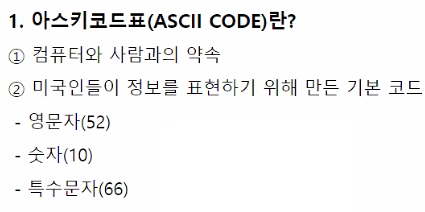

In [82]:
# 정수 인코딩 : 컴퓨터는 10진법으로 텍스트를 표현하기 때문에 정수 인코딩으로 문자를 처리한다.

In [83]:
# 반복되는 문자 추출
# 단어 수가 많지 않고 반복이 있는 가사 선정.

text = """오늘 네가
보고싶다
널 다시 품에
안아보고 싶다
오늘 네가 난
생각난다
너랑 같이 산책하던
그곳에 서있다
너의 체온이
기억난다
따뜻하게 내 쉬던
숨소리 들려
오늘 네가
온 것 같아
우리 같이 잠들던
벤치에 기대니
시간이 흘러흘러
다시 만날 순 없지
그래도 보고싶다 널
그리운 내 사랑아
오늘 네가 정말
보고싶다
너를 다시 내 품에
안아보고 싶다
오늘 네가 난
생각난다
너를 쓰다듬던 손이
너를 기억한다
니가 보고싶다
"""

In [84]:
# 한글 쪼개기 (토큰화)
okt = Okt()
text = text.replace("\n", " ") # 데이터 정제
text1 = okt.morphs(text)

In [85]:
# 두 글자 이상의 문자들을 선별해서 담아줌
text2 = []
for word in text1:
    if 4 > len(word) > 1: # 조사와 지시대명사 다 날려버림
        text2.append(word)
print(text2)

# 조건에 맞는 단어들 다 리스트에 쌓아둠

['오늘', '다시', '안아', '보고', '싶다', '오늘', '같이', '산책', '하던', '서있다', '체온', '쉬던', '숨소리', '들려', '오늘', '같아', '우리', '같이', '잠들던', '벤치', '기대니', '시간', '흘러', '흘러', '다시', '만날', '없지', '그래도', '그리운', '사랑', '오늘', '정말', '다시', '안아', '보고', '싶다', '오늘', '기억']


In [86]:
len(text2), len(set(text2))

(38, 27)

In [87]:
# 키를 추가해줌
vocab = {}
for word in text2: # for 문을 돌리면서 처음 만난 단어라면 
    if word not in vocab: 
        vocab[word] = 0 # vocab 이라는 딕셔너리에 key와 value값 넣어준다
    vocab[word] += 1
vocab

{'오늘': 5,
 '다시': 3,
 '안아': 2,
 '보고': 2,
 '싶다': 2,
 '같이': 2,
 '산책': 1,
 '하던': 1,
 '서있다': 1,
 '체온': 1,
 '쉬던': 1,
 '숨소리': 1,
 '들려': 1,
 '같아': 1,
 '우리': 1,
 '잠들던': 1,
 '벤치': 1,
 '기대니': 1,
 '시간': 1,
 '흘러': 2,
 '만날': 1,
 '없지': 1,
 '그래도': 1,
 '그리운': 1,
 '사랑': 1,
 '정말': 1,
 '기억': 1}

In [88]:
vocab.items()

dict_items([('오늘', 5), ('다시', 3), ('안아', 2), ('보고', 2), ('싶다', 2), ('같이', 2), ('산책', 1), ('하던', 1), ('서있다', 1), ('체온', 1), ('쉬던', 1), ('숨소리', 1), ('들려', 1), ('같아', 1), ('우리', 1), ('잠들던', 1), ('벤치', 1), ('기대니', 1), ('시간', 1), ('흘러', 2), ('만날', 1), ('없지', 1), ('그래도', 1), ('그리운', 1), ('사랑', 1), ('정말', 1), ('기억', 1)])

In [89]:
# 정렬의 기준을 정한다
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse=True)
vocab_sorted

[('오늘', 5),
 ('다시', 3),
 ('안아', 2),
 ('보고', 2),
 ('싶다', 2),
 ('같이', 2),
 ('흘러', 2),
 ('산책', 1),
 ('하던', 1),
 ('서있다', 1),
 ('체온', 1),
 ('쉬던', 1),
 ('숨소리', 1),
 ('들려', 1),
 ('같아', 1),
 ('우리', 1),
 ('잠들던', 1),
 ('벤치', 1),
 ('기대니', 1),
 ('시간', 1),
 ('만날', 1),
 ('없지', 1),
 ('그래도', 1),
 ('그리운', 1),
 ('사랑', 1),
 ('정말', 1),
 ('기억', 1)]

In [90]:
# 빈도수가 높은 단어만 선별 (2개 이상)
word_to_index = {}
i = 0
for (word, freq) in vocab_sorted: # 워드, 빈도수가 vocab_sorted 여기에서 높은거 추출하고
    if freq > 1: # 2번 이상 반복되는 것들을 순서대로 레이블 인코딩? 해준다
        i += 1
        word_to_index[word] = i
word_to_index

{'오늘': 1, '다시': 2, '안아': 3, '보고': 4, '싶다': 5, '같이': 6, '흘러': 7}

In [91]:
# `말뭉치(Corpus)` : 언어학에서 (여러 언어의) 텍스트 집합을 뜻한다. 
# 여기까지의 과정이 아래와 같은 말뭉치를 직접 만들어 보는 과정이다.
"""
 ('오늘', 5),
 ('다시', 3),
 ('안아', 2),
 ('보고', 2),
 ('싶다', 2),
 ('같이', 2),
 ('흘러', 2),
"""

# [작업 순서]
# 1. 데이터 선정
# 2. 데이터 토큰화
# 3. 데이터 빈도 수를 따져서 말뭉치 생성
# 주의 할 점 : 말뭉치를 인코딩할 때는 숫자 `0`은 보통 인코딩에 포함 시키지 않는다. 
# 나중에 딥러닝 패딩 작업할 때 사용해야하기 때문이다.

"\n ('오늘', 5),\n ('다시', 3),\n ('안아', 2),\n ('보고', 2),\n ('싶다', 2),\n ('같이', 2),\n ('흘러', 2),\n"